# Assignment Random Forrest

### Importing packages & Opening the file

In [ ]:
# add here your code to prepare the import of titanic.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()
#Reading the file
#df_full=pd.read_csv(r'titanic.csv', sep='delimeter') # reading the data csv file
#df_full
# We set delimeter as separation in order to be able to read the file

Saving titanic.csv to titanic.csv


In [ ]:
import io
df_full = pd.read_csv(io.BytesIO(uploaded['titanic.csv']), sep = 'delimeter')
df_full

,pclass;survived;name;sex;age;sibsp;parch;ticket;fare;cabin;embarked
0,"1;1;Allen, Miss. Elisabeth Walton;female;29;0;..."
1,"1;1;Allison, Master. Hudson Trevor;male;0,9167..."
2,"1;0;Allison, Miss. Helen Loraine;female;2;1;2;..."
3,"1;0;Allison, Mr. Hudson Joshua Creighton;male;..."
4,"1;0;Allison, Mrs. Hudson J C (Bessie Waldo Dan..."
...,...
1305,"3;0;Zabour, Miss. Thamine;female;;1;0;2665;14,..."
1306,"3;0;Zakarian, Mr. Mapriededer;male;26,5;0;0;26..."
1307,"3;0;Zakarian, Mr. Ortin;male;27;0;0;2670;7,225..."
1308,"3;0;Zimmerman, Mr. Leo;male;29;0;0;315082;7,87..."


In [ ]:
#We create a new list for the columns, and delete the column that has the data compressed
df_full[['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']] = df_full['pclass;survived;name;sex;age;sibsp;parch;ticket;fare;cabin;embarked'].str.split(';', expand=True)
del df_full["pclass;survived;name;sex;age;sibsp;parch;ticket;fare;cabin;embarked"]
df_full

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,5500",C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0,"Zabour, Miss. Thamine",female,,1,0,2665,"14,4542",,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,"26,5",0,0,2656,"7,2250",,C
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,"7,2250",,C
1308,3,0,"Zimmerman, Mr. Leo",male,29,0,0,315082,"7,8750",,S


In [ ]:
df_full.survived.value_counts()

0    809
1    500
       1
Name: survived, dtype: int64

### Adding understandable documentation and code

##### Now we will clean the data 

In [ ]:
df_cleaned = df_full.drop(['name'], axis='columns')
df_cleaned.head()
# Here we erased the column name, and show the top 5 results

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,female,29,0,0,24160,"211,3375",B5,S
1,1,1,male,"0,9167",1,2,113781,"151,5500",C22 C26,S
2,1,0,female,2,1,2,113781,"151,5500",C22 C26,S
3,1,0,male,30,1,2,113781,"151,5500",C22 C26,S
4,1,0,female,25,1,2,113781,"151,5500",C22 C26,S


In [ ]:
# Now we must change the type of survived to a Integer
# To do this, first we change it to float64, and then to Int64
df_cleaned['survived'] = df_cleaned['survived'].apply(pd.to_numeric, errors='coerce')
df_cleaned['survived'] = df_cleaned['survived'].astype('Int64')
# Now we drop the Not available values from the column 'survived'
df_cleaned = df_cleaned.dropna(subset = ['survived'])
# We count once again the number of survivors and deaths
df_cleaned.survived.value_counts()

0    809
1    500
Name: survived, dtype: Int64

In [ ]:
df_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,female,29,0,0,24160,"211,3375",B5,S
1,1,1,male,"0,9167",1,2,113781,"151,5500",C22 C26,S
2,1,0,female,2,1,2,113781,"151,5500",C22 C26,S
3,1,0,male,30,1,2,113781,"151,5500",C22 C26,S
4,1,0,female,25,1,2,113781,"151,5500",C22 C26,S


In [ ]:
df_cleaned['survived'].dtype

Int64Dtype()

I just realized the code below didn't work because my column 'survived' was already an int64

In [ ]:
# When running this code I ran into  TypeError: object cannot be converted to an IntegerDtype
# So I changed it to the code above


# df_cleaned['survived'] = df_cleaned['survived'].astype('Int64')

# df_cleaned = df_cleaned.dropna(subset = ['survived'])

# df_cleaned.survived.value_counts()
# df_cleaned.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() 
# Here we encode target labels between 0 and 1, this only works for object or string types
df_cleaned['survived'] = labelencoder.fit_transform(df_cleaned['survived'])
df_cleaned['pclass'] = labelencoder.fit_transform(df_cleaned['pclass'])
df_cleaned['sex'] = labelencoder.fit_transform(df_cleaned['sex'])
df_cleaned['age'] = labelencoder.fit_transform(df_cleaned['age'])
df_cleaned['sibsp'] = labelencoder.fit_transform(df_cleaned['sibsp'])
df_cleaned['parch'] = labelencoder.fit_transform(df_cleaned['parch'])
df_cleaned['ticket'] = labelencoder.fit_transform(df_cleaned['ticket'])
df_cleaned['fare'] = labelencoder.fit_transform(df_cleaned['fare'])
df_cleaned['cabin'] = labelencoder.fit_transform(df_cleaned['cabin'])
df_cleaned['embarked'] = labelencoder.fit_transform(df_cleaned['embarked'])

df_cleaned.head()


,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,1,0,38,0,0,187,78,44,3
1,0,1,1,7,1,2,49,57,80,3
2,0,0,0,22,1,2,49,57,80,3
3,0,0,1,40,1,2,49,57,80,3
4,0,0,0,32,1,2,49,57,80,3


In [ ]:
df_cleaned.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [ ]:
# Here we drop the column survived
df = df_cleaned
df_without_survived = df.drop(['survived'], axis='columns')

##### On the following code, make a model prediction of the Titanic survivors

In [ ]:
# We start by splitting arrays or mattrices into random train subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['survived'], axis='columns'),df.survived,test_size=0.2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

RandomForestClassifier is an estimator that takes another estimator as a parameter, here it fits a number of decision trees on various sub samples to improve the accuracy of the model, we have here 50 number of trees.
On the other hand, the Random Forrest method is a Supervised Machine learning algorithm, I believe that this Supervised Machine Learning algorithm learns from the outcome of each decision tree, in this case, it learns from the outcome of 50 different decision trees.

In [ ]:
# We use model.score to automate the prediction of our data by using x_test and comparing it to y_test
model.score(X_test,y_test)

0.7824427480916031

In [ ]:
y_predicted = model.predict(X_test)
# We assign to y_predict the derived prediction of x_test

In [ ]:
# By using confusion_matrix we elevate the accuracy of classification
# Confusion matrix works well on binary models such as ours
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[135,  16],
       [ 41,  70]])

If I understand it correctly, on the result above we see that the model found 155 "true negative" values, 19 "false positives", 25 "false negatives", and 63 "true positives".
On the code below we will show this information on a heatmap.
We can conclude that our model is pretty accurate when comparing the false negatives and positives with the true ones.

Text(87.0, 0.5, 'Truth')

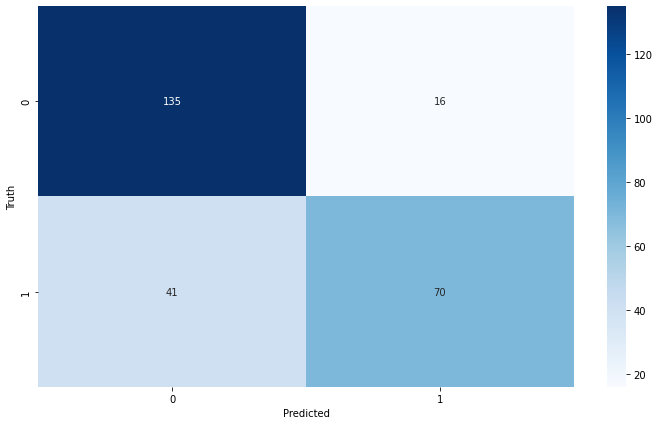

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(12,7))
sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Now we will start making the decision trees that we used, with the 50 outcomes.

[Text(0.5740758384146342, 0.9736842105263158, 'X[6] <= 186.5\ngini = 0.449\nsamples = 655\nvalue = [691, 356]'),
 Text(0.3562309451219512, 0.9210526315789473, 'X[7] <= 17.0\ngini = 0.492\nsamples = 376\nvalue = [331, 257]'),
 Text(0.21246189024390244, 0.868421052631579, 'X[1] <= 0.5\ngini = 0.458\nsamples = 274\nvalue = [272, 150]'),
 Text(0.0975609756097561, 0.8157894736842105, 'X[3] <= 0.5\ngini = 0.453\nsamples = 112\nvalue = [58, 109]'),
 Text(0.051829268292682924, 0.7631578947368421, 'X[4] <= 3.5\ngini = 0.289\nsamples = 52\nvalue = [14, 66]'),
 Text(0.04573170731707317, 0.7105263157894737, 'X[7] <= 1.0\ngini = 0.245\nsamples = 50\nvalue = [11, 66]'),
 Text(0.039634146341463415, 0.6578947368421053, 'X[2] <= 65.0\ngini = 0.253\nsamples = 49\nvalue = [11, 63]'),
 Text(0.03353658536585366, 0.6052631578947368, 'X[2] <= 12.5\ngini = 0.296\nsamples = 41\nvalue = [11, 50]'),
 Text(0.012195121951219513, 0.5526315789473685, 'X[8] <= 2.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.

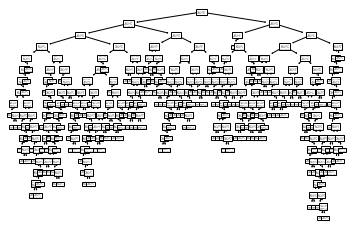

In [ ]:
from sklearn import tree
estimator = model.estimators_[5]
tree.plot_tree(estimator)

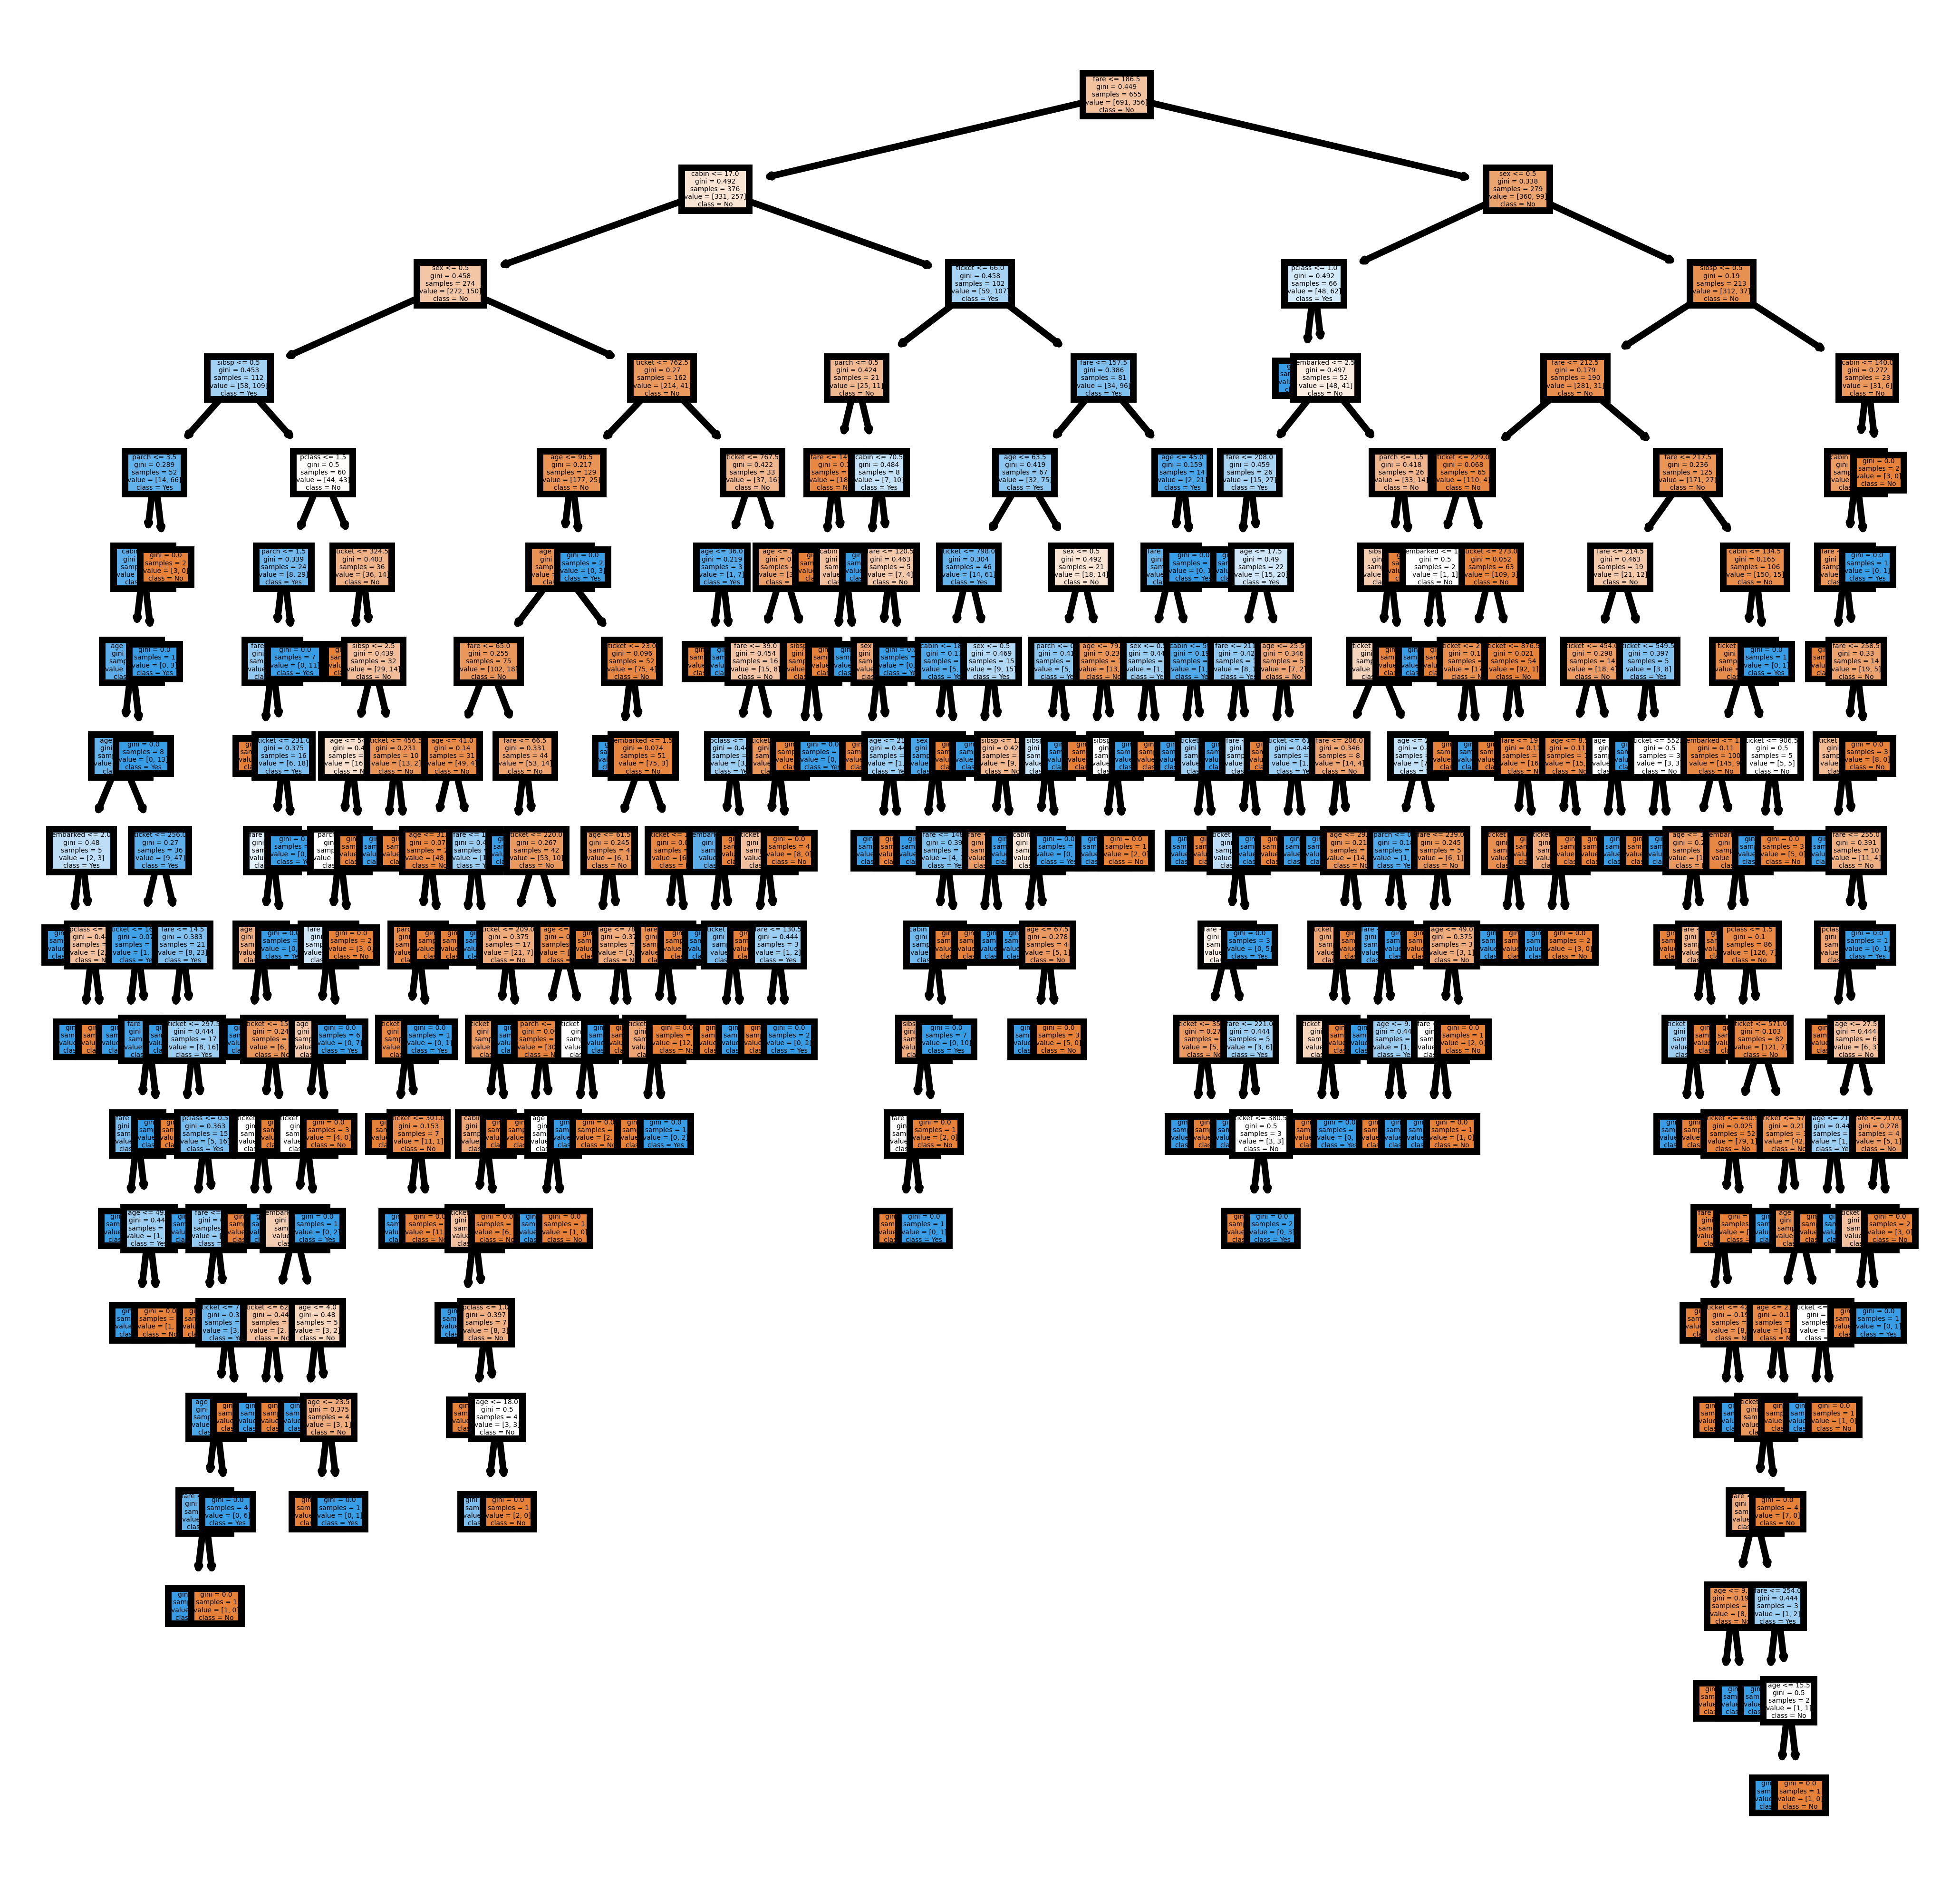

In [ ]:
fn=df_without_survived.columns
cn=['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)
tree.plot_tree(estimator,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('titanic_tree.png')

In [ ]:
from sklearn.tree import export_graphviz
# import pydot
# Here I received the ModuleNotFoundError: No module named 'pydot' so:
import pydot
tree = model.estimators_[5]
feature_list=df_without_survived.columns


export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('titanic_tree_better.png')

From here on, we will save the files, on the last cell of code I am not sure of the outcome because the code above doesn't work either.

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 164 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=81c2151329e1f6d33edb673f34646fd65e59a7b1ef51c26f702ddd2adb3f97d1
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz


In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(estimator, X_train, y_train,
               target_name="Titanic",
               feature_names=fn,
               class_names=cn,
               title="Titanic")

viz.save("decision_tree_Titanic.svg")


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


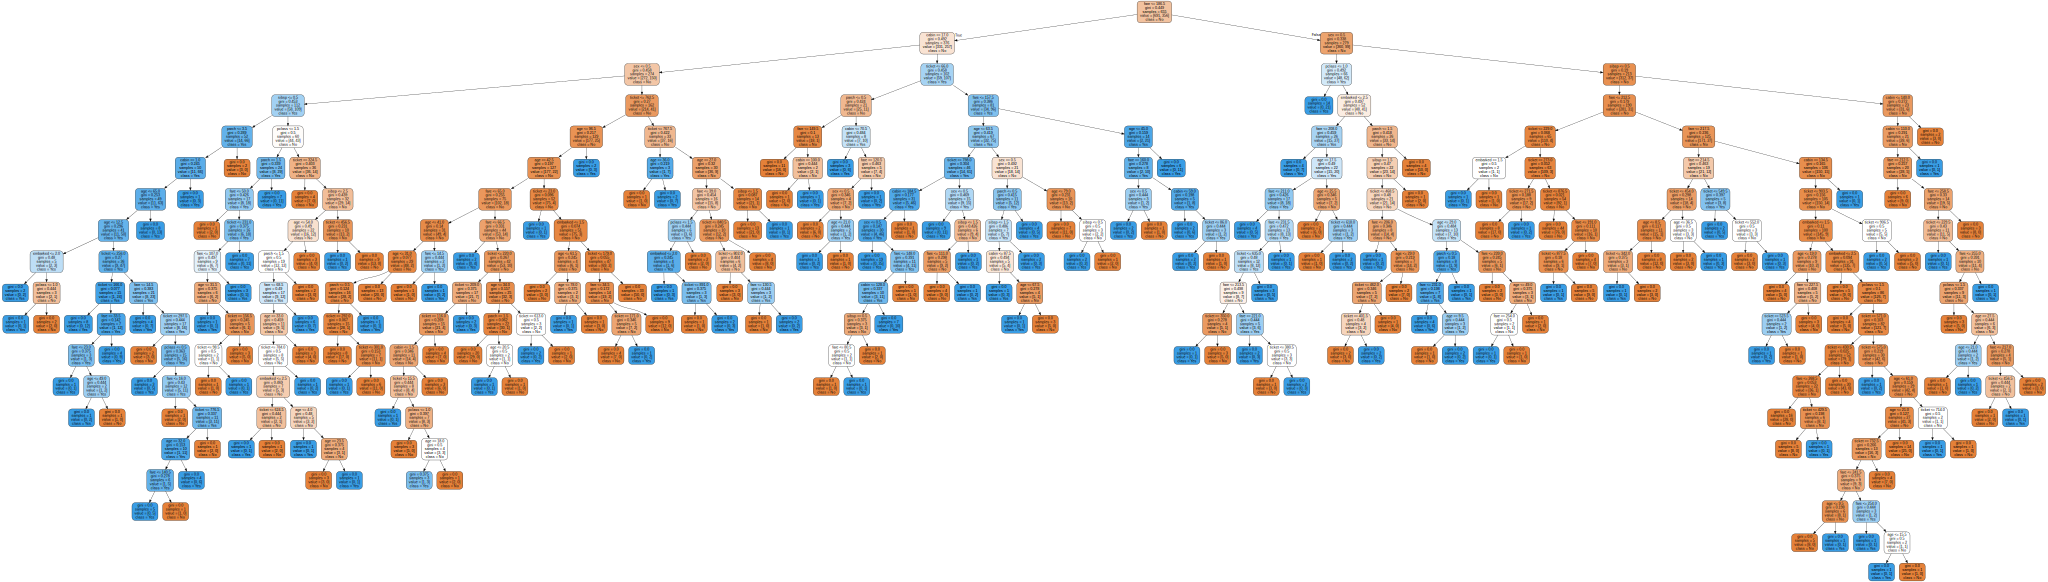

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(estimator, 
                           feature_names=fn,
                           class_names=cn, 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph